## Create qSIP and growth rate figures
 5.19.20

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Import data and double check

In [5]:
qsip = pd.read_csv("/Users/starr/Documents/papers/SIP/Connected/code/qSIP/ES_scaled_all_comparisons.txt", sep = "\t")

In [6]:
qsip.head()

,taxonID,comparisonID,trt.code.1,trt.code.2,wad1.obs.mean,wad2.obs.mean,wad1.boot.mean,wad1.boot.median,wad1.boot.CI.L,wad1.boot.CI.U,...,N.boot.CI.U,message,code,GC,taxonomy,size.bp,bin.type.ES,bin.type,bin.type.2,orig.order
0,1,1,bulk_6__12C,rhizosphere_6__13C,1.713701,1.736569,1.713701,1.713701,1.713701,1.713701,...,0.000002,none,SH_S37_Acidobacteria_60_12,58.83,bacteria,4268830,partial,partial,high.quality,1
1,2,1,bulk_6__12C,rhizosphere_6__13C,1.713579,1.741568,1.713579,1.713579,1.713579,1.713579,...,0.000012,none,SH_S37_Alphaproteobacteria_65_14,64.68,bacteria,987606,fragment,fragment,low.quality,2
2,3,1,bulk_6__12C,rhizosphere_6__13C,1.715673,1.748349,1.715673,1.715673,1.715673,1.715673,...,0.000004,none,SH_S37_Armatimonadetes_63_6,63.16,bacteria,742274,fragment,fragment,low.quality,3
3,4,1,bulk_6__12C,rhizosphere_6__13C,1.714175,1.748485,1.714175,1.714175,1.714175,1.714175,...,0.000005,none,SH_S37_Asticcacaulis_63_11,63.34,bacteria,2864781,partial,partial,high.quality,4
4,5,1,bulk_6__12C,rhizosphere_6__13C,1.715376,1.748626,1.715376,1.715376,1.715376,1.715376,...,0.000001,none,SH_S37_Bacteria_69_8,68.84,bacteria,3869434,fragment,fragment,low.quality,5


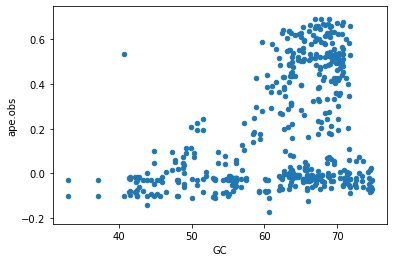

In [7]:
qsip.plot.scatter(x = "GC", y = "ape.obs")

In [8]:
qsip['taxonomy'].value_counts()

bacteria     424
eukaryote     49
phage         22
Name: taxonomy, dtype: int64

#### Week 6 data prep

In [9]:
#Retriev week 6 data '1'
week6 = qsip.loc[qsip['comparisonID']== 1]
week6 = week6.sort_values("ape.obs")
week6 = week6.reset_index()
#Rank based on APE
week6['rank'] = week6["ape.obs"].rank(ascending=1)
#Pull only partial genomes, no fragments for now
week6part = week6.loc[week6['bin.type'] != "fragment"]
week6part = week6part.sort_values("ape.obs").reset_index()
week6part['rank'] = week6part["ape.obs"].rank(ascending=1)
week6part["ape.percent"] = week6part["ape.obs"] * 100

#### Week 9 data prep

In [10]:
#Retriev week 9 data '2'
week9 = qsip.loc[qsip['comparisonID']== 2]
week9 = week9.sort_values("ape.obs")
week9 = week9.reset_index()
#Rank based on APE
week9['rank'] = week9["ape.obs"].rank(ascending=1)
#Pull only partial genomes, no fragments for now
week9part = week9.loc[week9['bin.type'] != "fragment"]
week9part = week9part.sort_values("ape.obs").reset_index()
week9part['rank'] = week9part["ape.obs"].rank(ascending=1)
week9part["ape.percent"] = week9part["ape.obs"] * 100

### Generate Figure 4

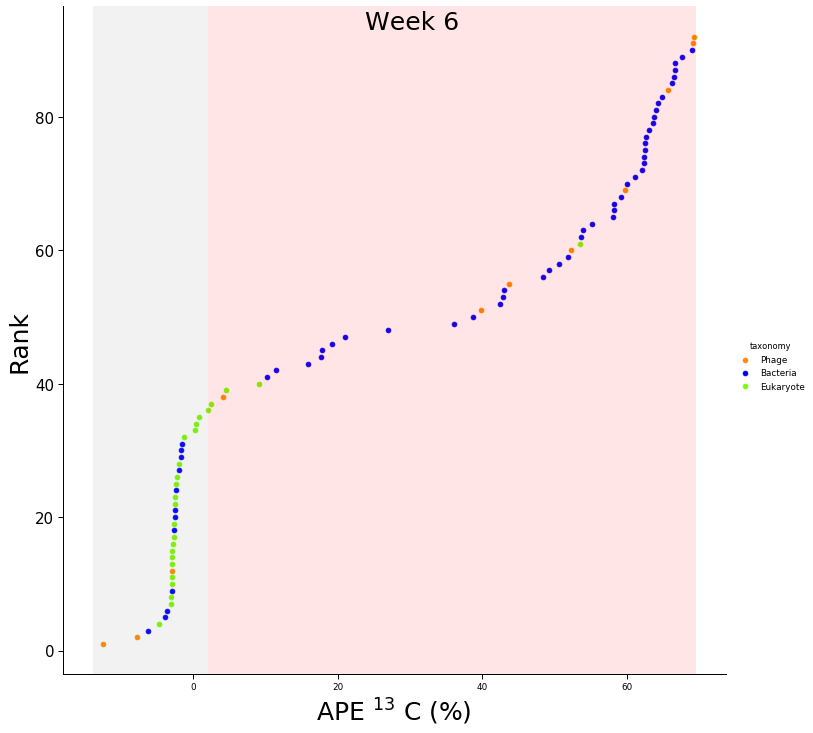

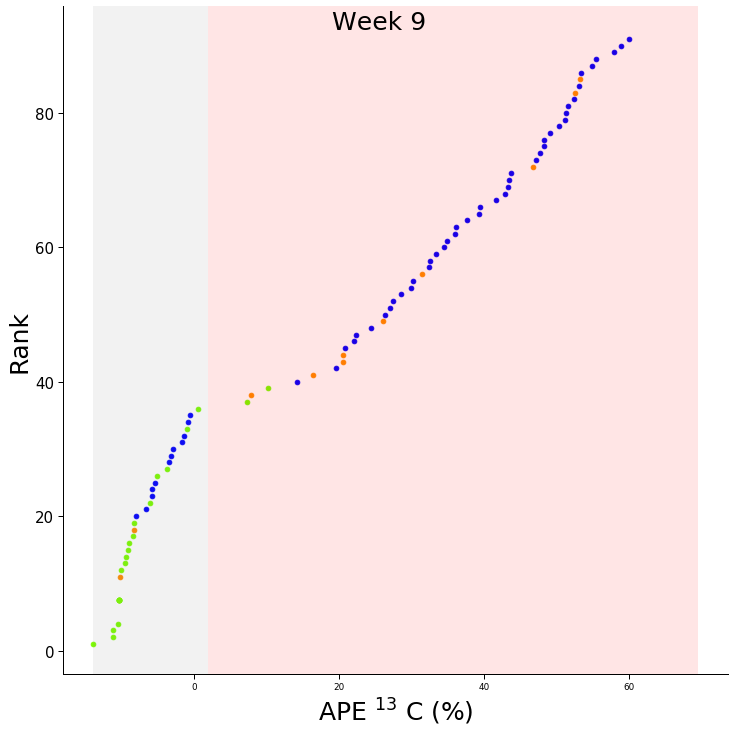

In [11]:
sns.set_context("paper")

week6part["taxonomy"] = week6part['taxonomy'].str.capitalize() 
week9part["taxonomy"] = week9part['taxonomy'].str.capitalize() 

g6 = sns.FacetGrid(week6part, hue="taxonomy", height=10, palette=["darkorange", "blue", "lawngreen"])
g6.map(plt.scatter, "ape.percent", "rank").add_legend()
g6.fig.suptitle('Week 6', size = 25) 
#Set APE labelled cut off to 2
plt.axvspan(-13.9, 2, facecolor='grey', alpha=0.1)
plt.axvspan(2, 69.5, facecolor='red', alpha=0.1)
g6.axes[0,0].set_ylabel('Rank', size = 25)
g6.axes[0,0].set_xlabel('APE $\mathregular{^{13}}$ C (%)',size = 25)
g6.set_yticklabels(fontsize=15)


g6.savefig("/Users/starr/Documents/papers/SIP/Connected/code/qSIP/qSIPweek6_correctCut.pdf", bbox_inches='tight')

g9 = sns.FacetGrid(week9part, hue="taxonomy", height=10, palette=["lawngreen", "darkorange", "blue"])
g9.fig.suptitle('Week 9', size = 25) 

g9.map(plt.scatter, "ape.percent", "rank")
#Set APE labelled cut off to 2
plt.axvspan(-13.9, 2, facecolor='grey', alpha=0.1)
plt.axvspan(2, 69.5, facecolor='red', alpha=0.1)
g9.axes[0,0].set_ylabel('Rank', size = 25)
g9.axes[0,0].set_xlabel('APE $\mathregular{^{13}}$ C (%)', size = 25)
g9.set_yticklabels(size=15)
g9.savefig("/Users/starr/Documents/papers/SIP/Connected/code/qSIP/qSIPweek9_correctCut.pdf", bbox_inches='tight')

## Generate growth rate vs APE figure (Supplemental Figure 4) 

In [12]:
#Get growth rate and taxonomy file
grow = pd.read_csv("/Users/starr/Documents/papers/SIP/Connected/code/qSIP/growthrate_ape.txt", sep = "\t")
taxa = pd.read_csv("/Users/starr/Documents/papers/SIP/Connected/code/qSIP/ES_taxa_ID.txt", sep = "\t")
#Merge data
growtax = pd.merge(grow,
                 taxa[['code', 'taxonomy', 'size.bp']],
                 on='code')
growtax.head()

,code,week,APE,growth,taxonomy,size.bp
0,SM_S39_Burkholderiales_62_29,6,62.538832,7.643945,bacteria,6692562
1,SM_S39_Burkholderiales_62_29,9,26.402965,1.012924,bacteria,6692562
2,SL_S38_scaffold_831,6,4.143922,6.074007,phage,8777
3,SL_S38_scaffold_831,9,7.835328,0.477850,phage,8777
4,SM_S39_Burkholderiales_69_25,6,62.614691,4.298720,bacteria,6545318


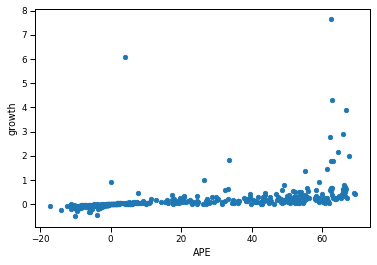

In [13]:
#Check data
growtax.plot.scatter(x = "APE", y = "growth")

/Users/starr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


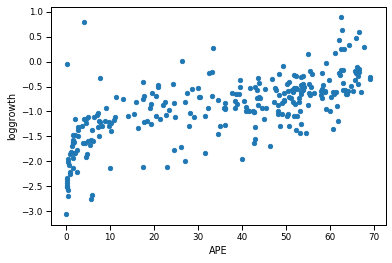

In [14]:
#Take log of growth
growtax['loggrowth'] = np.log10(growtax['growth']) 
growtax.plot.scatter(x = "APE", y = "loggrowth")
#will get errors because of negative growth rate values. Recheck data

In [15]:
#Remove the plant from the data
growtax=growtax[growtax.code != 'SL_S38_scaffold_831']

### Generate violin of log growth (A)

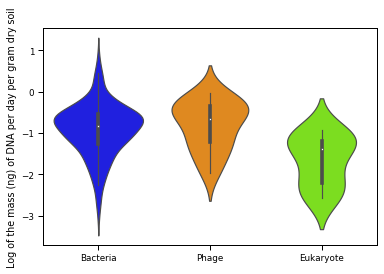

In [18]:
growtax["taxonomy"] = growtax["taxonomy"].str.capitalize()
violingrow = sns.violinplot( x=growtax["taxonomy"], y=growtax["loggrowth"], height=10, palette=["blue", "darkorange", "lawngreen"],size =20 )
violingrow.set_ylabel("Log of the mass (ng) of DNA per day per gram dry soil")
violingrow.set_xlabel("", size =20)

plt.savefig("/Users/starr/Documents/papers/SIP/Connected/code/qSIP/violingrowth.pdf")


### Generate log of growth vs APE figure (B)

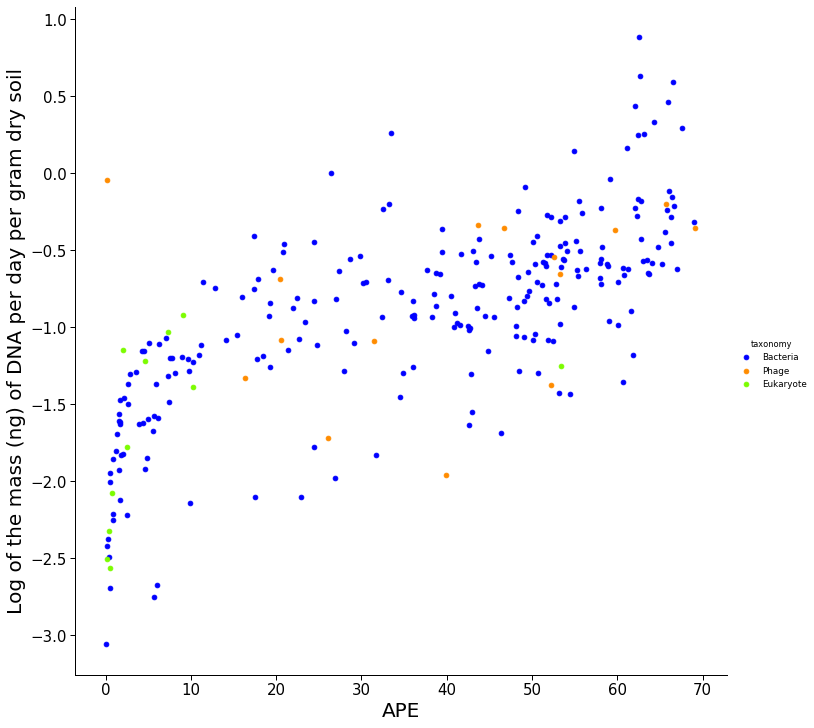

In [19]:
growplot = sns.FacetGrid(growtax, hue="taxonomy", height=10, palette=["blue", "darkorange", "lawngreen"])
growplot.map(plt.scatter, "APE", "loggrowth").add_legend()
growplot.axes[0,0].set_ylabel('Log of the mass (ng) of DNA per day per gram dry soil', size = 20)
growplot.axes[0,0].set_xlabel('APE', size = 20)
growplot.set_yticklabels(fontsize=15)
growplot.set_xticklabels(fontsize=15)

plt.savefig("/Users/starr/Documents/papers/SIP/Connected/code/qSIP/growthvsAPE.pdf")
